In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import pickle
import time
from sklearn.model_selection import train_test_split
import os
import random
import copy
import pandas as pd
import datetime as dt

In [2]:
os.chdir("YOUR PATH HERE")
df = pd.read_csv("full_ds.csv")
df = df[df.SurveyYear > 2014]

In [4]:
numeric = ["TripTotalTime", 'NumStages', 'JD', 'HHoldNumAdults', 'HHoldNumChildren', 'NumVehicles']

In [18]:
row, col = 3,2

In [28]:
coord_1 = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
coord_2 = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [112]:
def plot_scatter(column):
    plots_dict = {"TripTotalTime": "Trip travel time", 'NumStages': 'Number of stages', 'JD': 'Distance of journey',
              'HHoldNumAdults': "Number of adults", 'HHoldNumChildren': "Number of children", 
              'NumVehicles': "Number of vehicles"}
    plt.scatter(df[column], df['TripTotalTime'])
    plt.title('Trip total time' + ' vs.' + plots_dict[column])
    plt.xlabel(plots_dict[column])
    plt.ylabel("Trip total time, min")
    plt.savefig(plots_dict[column] +'.png')
    

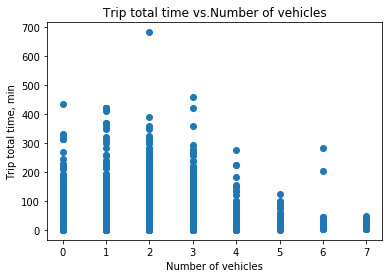

In [117]:
plot_scatter('NumVehicles')    

In [39]:
TripPurpose_B04ID_list = ["Commuting", "Business", "Education/escort education", "Shopping", "Other escort", "Personal business", "Leisure", 
     "Other including just walk"]
TravDay_list = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
TripPurpTo_B01ID_list = ["Work", "In course of work", "Education", "Food shopping", "Non food shopping",
                         "Personal business medical", "Personal business eat/drink", "Personal business other",
                         "Eat/drink with friends", "Visit friends", "Other social", "Entertain/ public activity",
                         "Sport: participate", "Holiday: base", "Day trip/just walk", "Other non-escort", "Escort home", 
                         "Escort work", "Escort in course of work", "Escort education", "Escort shopping/personal business",
                         "Other escort"]
TripStart_B01ID_list = [ '00 AM','01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', '08 AM', '09 AM', '10 AM', '11 AM',
                        '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM']
HRPWorkStat_B02ID_list = ["Full time", "Part time", "Retired/permanently sick", "Other non-work"]
HRPSEGWorkStat_B01ID_list = ["Professional/managerial", "Clerical", "Skilled manual", "Other manual and other/missing SEGs",
                             "Retired/permanently sick", "Other economically inactive"]
Age_B04ID_list = ["0-4 years", "5-10 years", "11-16 years", "17-20 years", "21-29 years", "30-39 years", "40-49 years",
                  "50-59 years", "60+ years"] 
OfPenAge_B01ID_list = ["Yes", "No"]
Sex_B01ID_list = ["Male", "Female"]
CarAccess_B02ID_list = ["Main driver of company car", "Other main driver", "Not main driver of household car", 
                        "Household car but non driver", "Driver but no car", "Non driver and no car"]

In [ ]:

hours = [dt.time(i).strftime('%I %p') for i in range(24)]

In [40]:
dict_dum_val = {"MainMode_B04ID": {1: "Walk", 2: "Bicycle", 3: "Car/van driver", 4: "Car/van passenger", 5: "Motorcycle", 6: "Other private transport", 7: "Bus in London",
8: "Other local bus", 9: "Non-local bus", 10: "London Underground", 11: "Surface Rail", 12: "Taxi/minicab", 13: "Other public transport"},
 "TripPurpose_B04ID" : {k: v for k, v in enumerate(TripPurpose_B04ID_list)}, 
 "TravDay" : {k: v for k, v in enumerate(TravDay_list)},
 'TripPurpFrom_B01ID': {k: v for k, v in enumerate(TripPurpTo_B01ID_list)},
 'TripPurpTo_B01ID': {k: v for k, v in enumerate(TripPurpTo_B01ID_list)}, 
 'TripStart_B01ID': {k: v for k, v in enumerate(TripStart_B01ID_list)},
 'HRPWorkStat_B02ID': {k: v for k, v in enumerate(HRPWorkStat_B02ID_list)},
 'HRPSEGWorkStat_B01ID': {k: v for k, v in enumerate(HRPSEGWorkStat_B01ID_list)},
 'Age_B04ID': {k: v for k, v in enumerate(Age_B04ID_list)},
  'OfPenAge_B01ID': {k: v for k, v in enumerate(OfPenAge_B01ID_list)},
 'Sex_B01ID': {k: v for k, v in enumerate(Sex_B01ID_list)},
 'CarAccess_B02ID': {k: v for k, v in enumerate(CarAccess_B02ID_list)}}

In [120]:
plots_list = ['MainMode_B04ID', 'TripPurpose_B04ID', "TravDay", 'TripPurpFrom_B01ID', 'TripPurpTo_B01ID', 
           'TripStart_B01ID', 'HRPWorkStat_B02ID', 'HRPSEGWorkStat_B01ID', 'Age_B04ID',
           'OfPenAge_B01ID', 'Sex_B01ID', 'CarAccess_B02ID']
coord_1 = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
coord_2 = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [129]:
plots_dict = {'TripTotalTime': 'Trip time', 'MainMode_B04ID': "Trip mode", 'TripPurpose_B04ID': 'Trip purpose', "TravDay": "Day of travel", 'TripPurpFrom_B01ID': "Trip purpose from", 'TripPurpTo_B01ID': "Trip purpose to", 
           'TripStart_B01ID': "Hour trip started", 'HRPWorkStat_B02ID': "Work status", 'HRPSEGWorkStat_B01ID': "Employment position", 'Age_B04ID': "Respondent age bands",
           'OfPenAge_B01ID': "Respondent is retired", 'Sex_B01ID': "Traveller's sex", 'CarAccess_B02ID': 'Access to car'}

KeyError: 'MainMode_B04ID'

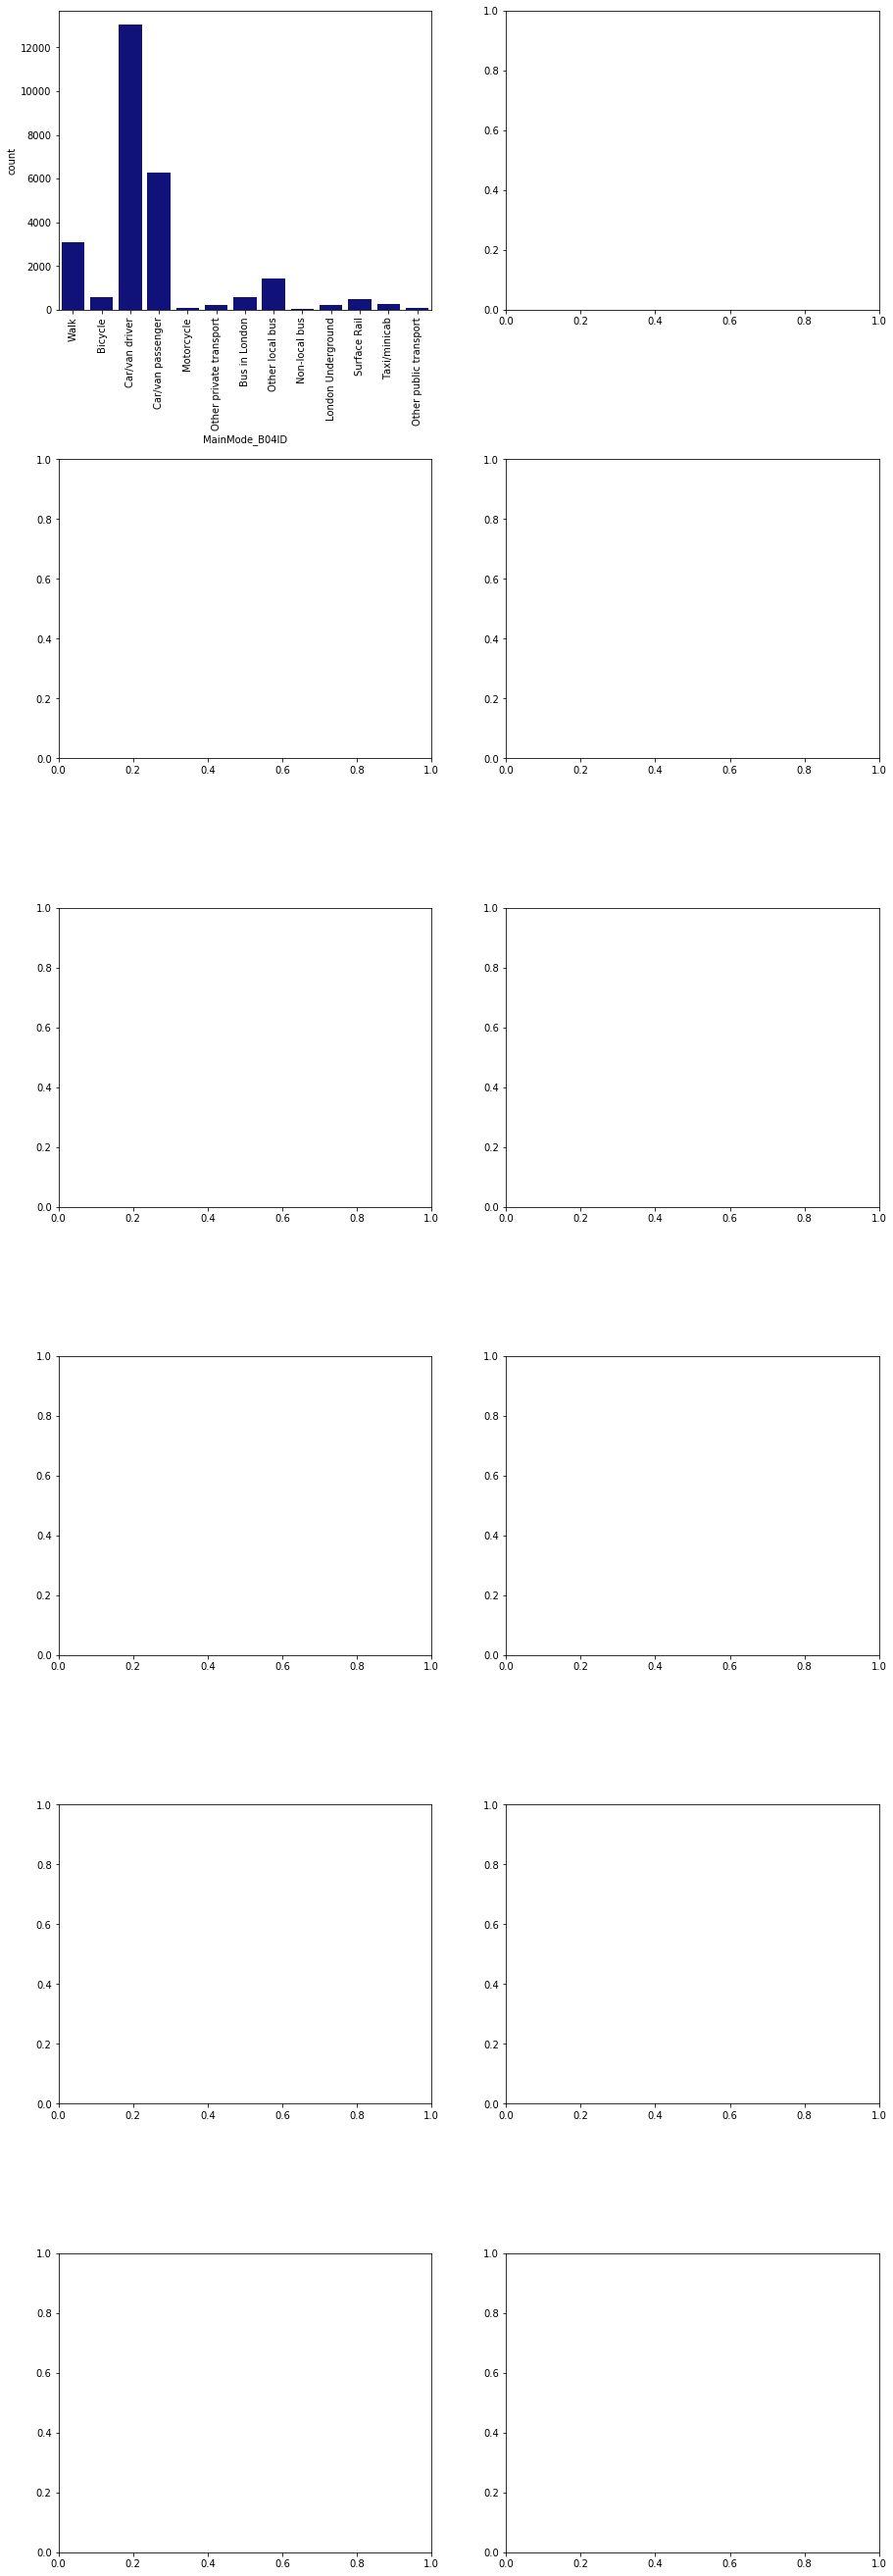

In [135]:
f, axes = plt.subplots(6,2, figsize=(15,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=2.5, wspace=0.2, hspace=0.5)

for i in range(0,len(dummies)+1):
    p = sns.countplot(x=plots_list[i], data=df, ax = axes[coord_1[i], coord_2[i]], color='darkblue')
    plot_labels = dict_dum_val[plots_list[i]].values()
    p.set_xticklabels(plot_labels, rotation=90)
    print(plots_dict[plots_list[i]])
    p.axes.set_title(plots_dict[plots_list[i]], fontsize=20,color="black")
    p.set(ylabel='Count', xlabel = '')

[Text(0, 0.5, 'Trip travel time'),
 Text(0, 1.5, 'Number of stages'),
 Text(0, 2.5, 'Distance of journey'),
 Text(0, 3.5, 'Number of adults'),
 Text(0, 4.5, 'Number of children'),
 Text(0, 5.5, 'Number of vehicles')]

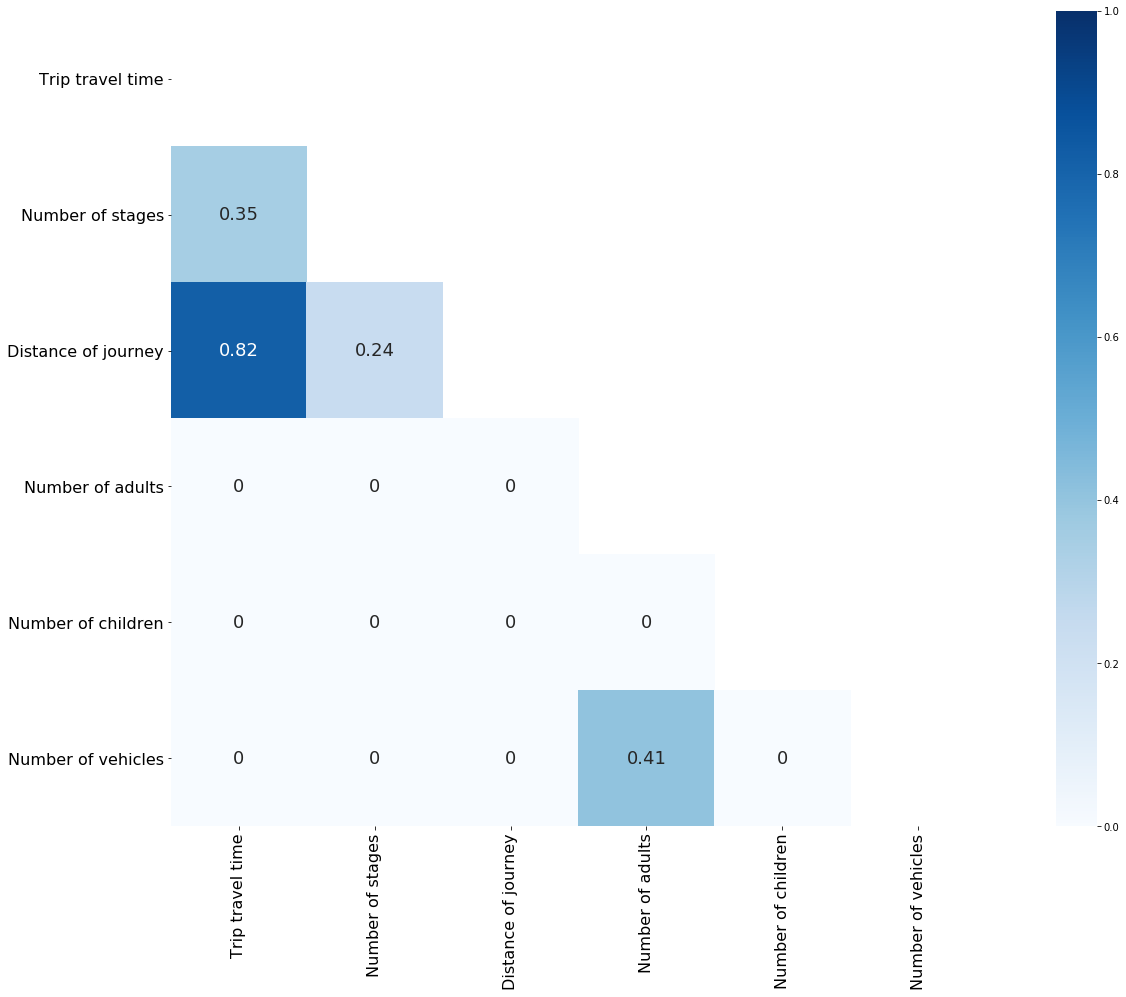

In [134]:
plots_dict = {"TripTotalTime": "Trip travel time", 'NumStages': 'Number of stages', 'JD': 'Distance of journey',
              'HHoldNumAdults': "Number of adults", 'HHoldNumChildren': "Number of children", 
              'NumVehicles': "Number of vehicles"}
f, ax = plt.subplots(figsize=(25, 15))
df[["TripTotalTime", 'NumStages', 'JD', 'HHoldNumAdults', 'HHoldNumChildren', 'NumVehicles']].corr()
# corr[abs(corr) < 0.1] = 0

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr,  mask=mask, cmap="Blues", square=True, ax=ax, annot = True, annot_kws={"size":18})
labs = [plots_dict[i] for i in corr.columns]
g.set_xticklabels(labs, fontsize = 16, rotation=90) #g.get_xmajorticklabels()
g.set_yticklabels(labs, fontsize = 16, rotation=0)

In [67]:
corr = df[["TripTotalTime", 'NumStages', 'JD', 'HHoldNumAdults', 'HHoldNumChildren', 'NumVehicles']].corr()

In [68]:
corr

,TripTotalTime,NumStages,JD,HHoldNumAdults,HHoldNumChildren,NumVehicles
TripTotalTime,1.000000,0.347674,0.817382,0.025551,-0.076690,-0.018369
NumStages,0.347674,1.000000,0.241636,0.014308,-0.035970,-0.052184
JD,0.817382,0.241636,1.000000,0.002380,-0.058580,0.077806
HHoldNumAdults,0.025551,0.014308,0.002380,1.000000,-0.040826,0.409895
HHoldNumChildren,-0.076690,-0.035970,-0.058580,-0.040826,1.000000,-0.019951
NumVehicles,-0.018369,-0.052184,0.077806,0.409895,-0.019951,1.000000


In [88]:
df[["TripTotalTime", 'NumStages', 'JD', 'HHoldNumAdults', 'HHoldNumChildren', 'NumVehicles']].describe().to_csv("desc.csv")

In [108]:
coord_1 = [0, 0, 1, 1, 2, 2]
coord_2 = [0, 1, 0, 1, 0, 1]
plots_dict = {"TripTotalTime": "Trip travel time", 'NumStages': 'Number of stages', 'JD': 'Distance of journey',
              'HHoldNumAdults': "Number of adults", 'HHoldNumChildren': "Number of children", 
              'NumVehicles': "Number of vehicles"}
plots_axis = {"TripTotalTime": " , minutes", 'NumStages': ' , stages', 'JD': ' , km',
              'HHoldNumAdults': "", 'HHoldNumChildren': "", 
              'NumVehicles': ""}

In [104]:
numeric

['TripTotalTime',
 'NumStages',
 'JD',
 'HHoldNumAdults',
 'HHoldNumChildren',
 'NumVehicles']

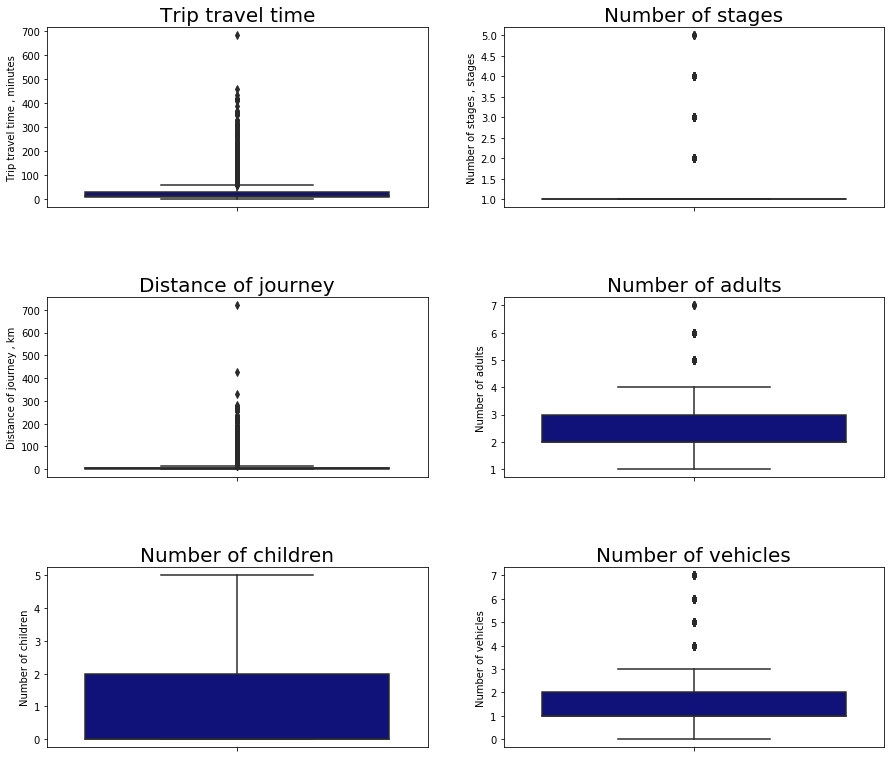

In [131]:
plots_dict = {"TripTotalTime": "Trip travel time", 'NumStages': 'Number of stages', 'JD': 'Distance of journey',
              'HHoldNumAdults': "Number of adults", 'HHoldNumChildren': "Number of children", 
              'NumVehicles': "Number of vehicles"}
f, axes = plt.subplots(3,2, figsize=(15,25))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.5, wspace=0.2, hspace=0.5)

for i in range(0,len(numeric)):
    p = sns.boxplot(y=numeric[i], data=df, ax = axes[coord_1[i], coord_2[i]], color='darkblue')
    p.axes.set_title(plots_dict[numeric[i]], fontsize=20,color="black")
    p.set(ylabel= plots_dict[numeric[i]] + plots_axis[numeric[i]], xlabel = '')

In [139]:
train = pd.read_csv("trip_travel_2015.csv")
y = train["TripTotalTime"].values
X = train.drop(["TripTotalTime"], axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [137]:
reg = RandomForestRegressor()

In [141]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [273]:
test_samples = pd.DataFrame(X_test, columns = train.drop(["TripTotalTime"], axis = 1).columns)

In [275]:
test_samples['True Time'] = y_test
test_samples["Predicted Time"] = y_pred

In [287]:
df_test = test_samples.sample(20)
df_test.to_csv("TRUE PREDICTED.csv", index = False)

Text(0, 0.5, 'Predicted Time')

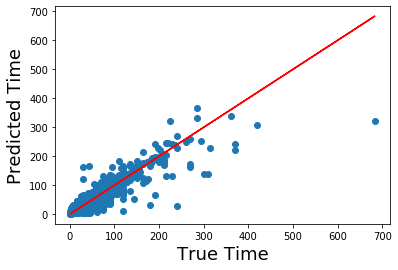

In [286]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel('True Time', size = 18)
plt.ylabel('Predicted Time', size = 18)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 <a list of 10 Text yticklabel objects>)

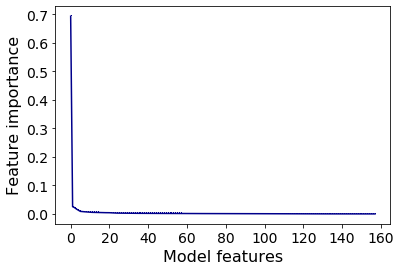

In [173]:
plt.plot(sorted(importance, reverse=True), marker=',', color='darkblue')
plt.xlabel('Model features', size = 16)
plt.ylabel("Feature importance", size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)


In [261]:
importance = reg.feature_importances_
u = {k: v for k,v in zip(importance, train.columns[1:])}
first_15 = sorted(importance, reverse=True)[:15]
features_important = {k: v for k, v in u.items() if k in first_15}
features_names = features_important.values()

In [270]:
u

{0.02545749396256205: 'NumStages',
 0.6928810899074365: 'JD',
 0.008906758225392143: 'HHoldNumAdults',
 0.005303619825650699: 'HHoldNumChildren',
 0.007610339781210946: 'NumVehicles',
 0.005320217345211986: 'MainMode_B04ID_2',
 0.01691006168948632: 'MainMode_B04ID_3',
 0.022002995031710437: 'MainMode_B04ID_4',
 0.0005075944878961502: 'MainMode_B04ID_5',
 0.002362773994445003: 'MainMode_B04ID_6',
 0.0037985607414858873: 'MainMode_B04ID_7',
 0.008070718411078908: 'MainMode_B04ID_8',
 0.0010324207006973177: 'MainMode_B04ID_9',
 0.0026347823356997627: 'MainMode_B04ID_10',
 0.005844292466064797: 'MainMode_B04ID_11',
 0.0025753170864589534: 'MainMode_B04ID_12',
 0.0003221097526342752: 'MainMode_B04ID_13',
 0.0007204497894268095: 'TripPurpose_B04ID_2',
 0.0009678732357485134: 'TripPurpose_B04ID_3',
 0.0011364102825465647: 'TripPurpose_B04ID_4',
 0.0006727863551391426: 'TripPurpose_B04ID_5',
 0.0007057550913418768: 'TripPurpose_B04ID_6',
 0.0018250401794419429: 'TripPurpose_B04ID_7',
 0.013031

In [266]:
features_ = {v: k for k, v in features_important.items() if k>0.007}
features_

{'NumStages': 0.02545749396256205,
 'JD': 0.6928810899074365,
 'HHoldNumAdults': 0.008906758225392143,
 'NumVehicles': 0.007610339781210946,
 'MainMode_B04ID_3': 0.01691006168948632,
 'MainMode_B04ID_4': 0.022002995031710437,
 'MainMode_B04ID_8': 0.008070718411078908,
 'TripPurpose_B04ID_8': 0.013031051351400817}

In [267]:
[plots_dict[i] for i in features_]

['Number of stages',
 'Distance of journey',
 'Number of adults',
 'Number of vehicles',
 'Mode: Car/van driver',
 'Mode: Car/van passenger',
 'Mode: Other local bus',
 'Purpose: Other including just walk']

In [222]:
plots_dict = {"TripTotalTime": "Trip travel time", 
              'NumStages': 'Number of stages', 
              'JD': 'Distance of journey',
              'HHoldNumAdults': "Number of adults",
              'HHoldNumChildren': "Number of children", 
              "MainMode_B04ID_2": 'Mode: Bicycle',
              "MainMode_B04ID_3": 'Mode: Car/van driver',
              "MainMode_B04ID_4": 'Mode: Car/van passenger',
              "MainMode_B04ID_8": 'Mode: Other local bus',
              "MainMode_B04ID_11": 'Mode: Surface rail',
              'TripPurpose_B04ID_8': "Purpose: Other including just walk",
              'TripDisIncSW_B01ID_5': '',
              'TripPurpFrom_B01ID_2': "From: Education", 
              'NumVehicles': "Number of vehicles", 'TripTotalTime': 'Trip time', 'MainMode_B04ID': "Trip mode", 'TripPurpose_B04ID': 'Trip purpose', "TravDay": "Day of travel", 'TripPurpFrom_B01ID': "Trip purpose from", 'TripPurpTo_B01ID': "Trip purpose to", 
           'TripStart_B01ID': "Hour trip started", 'HRPWorkStat_B02ID': "Work status", 'HRPSEGWorkStat_B01ID': "Employment position", 'Age_B04ID': "Respondent age bands",
           'OfPenAge_B01ID': "Respondent is retired", 'Sex_B01ID': "Traveller's sex", 'CarAccess_B02ID': 'Access to car'}

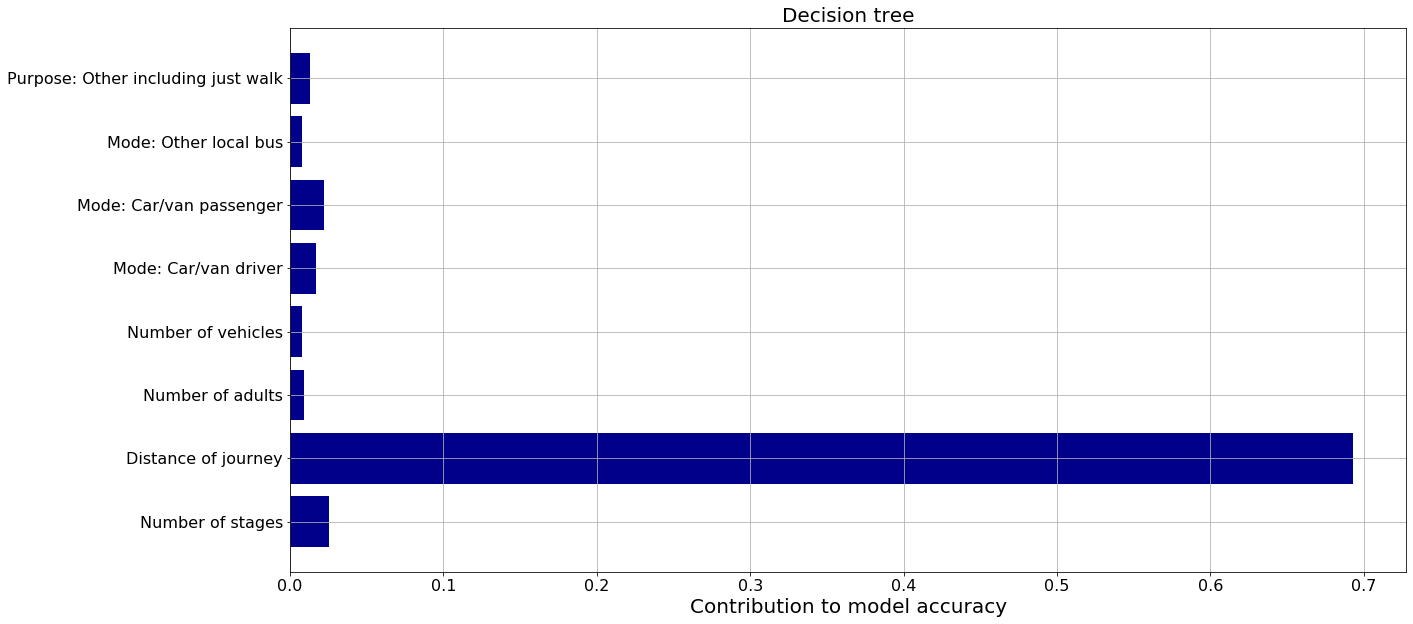

In [269]:
features1f = [plots_dict[i] for i in features_]
pos = np.arange(len(features_))
plt.figure(figsize=(20,10))
plt.barh(pos, features_.values(), align='center', color = 'darkblue')
plt.title("Decision tree", fontsize = 20)
plt.xlabel("Contribution to model accuracy", fontsize = 20)
#plt.ylabel("Features")
plt.yticks(pos, features1f)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)